In [9]:
import pandas as pd

In [10]:
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv(r'C:\Users\CVR\Downloads\GlobalLandTemperaturesByCity.csv')

In [12]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [15]:
city= df[df['City']=='New York'].copy()

In [16]:
city['dt'] = pd.to_datetime(city['dt'],errors='coerce')
city['year'] =city['dt'].dt.year 

In [17]:
avg_temp= city.groupby('year')['AverageTemperature'].mean().reset_index()
avg_temp

,year,AverageTemperature
0,1743,3.264000
1,1744,11.660375
2,1745,1.134500
3,1746,NaN
4,1747,NaN
...,...,...
266,2009,10.141833
267,2010,11.357583
268,2011,11.272250
269,2012,11.971500


Text(0, 0.5, 'Average Temperature')

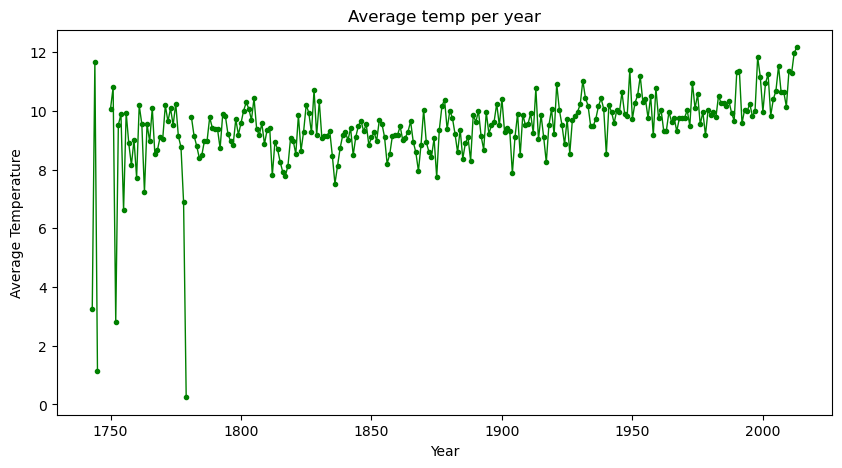

In [18]:
plt.figure(figsize=(10,5))
plt.plot(avg_temp['year'],avg_temp['AverageTemperature'], linestyle='-', color='green',marker='.', linewidth=1)
plt.title('Average temp per year', fontsize=12)
plt.xlabel('Year')
plt.ylabel('Average Temperature') 

In [19]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [20]:
avg_tempe= df.groupby('Country')['AverageTemperature'].mean().reset_index().head(10)
avg_tempe
c_avg_tempe = avg_tempe.dropna()

In [21]:
top=avg_tempe.sort_values(by='AverageTemperature',ascending=True).head(10)

Text(0, 0.5, 'Average Temperature')

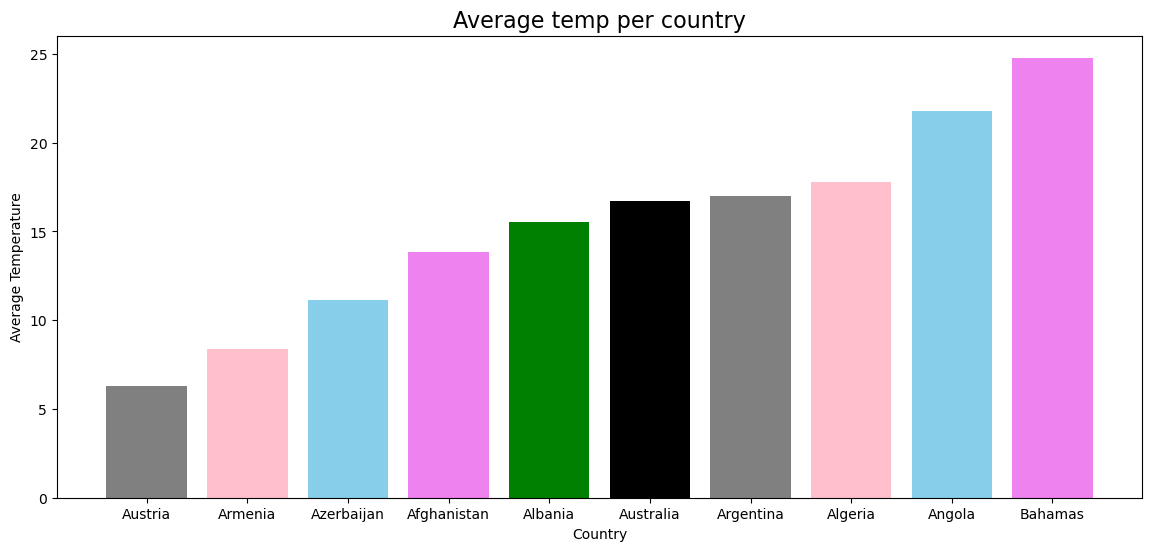

In [22]:
plt.figure(figsize=(14,6))
plt.bar(top['Country'],top['AverageTemperature'],color=['grey', 'pink','skyblue', 'violet','green','black', 'grey', 'pink','skyblue', 'violet'])
plt.title('Average temp per country', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Average Temperature')

In [23]:
#Histogram - Distribution of avg temp across all data

In [24]:
dist=df['AverageTemperature'].dropna()
dist

0           6.068
5           5.788
6          10.644
7          14.051
8          16.082
            ...  
8599206     7.710
8599207    11.464
8599208    15.043
8599209    18.775
8599210    18.025
Name: AverageTemperature, Length: 8235082, dtype: float64

In [25]:
count=df['AverageTemperature'].value_counts()
count

AverageTemperature
 26.544    828
 26.007    797
 26.045    778
 26.612    765
 26.091    757
          ... 
 7.254       1
-24.374      1
 7.680       1
-22.516      1
 6.660       1
Name: count, Length: 103481, dtype: int64

Text(0, 0.5, 'Frequency')

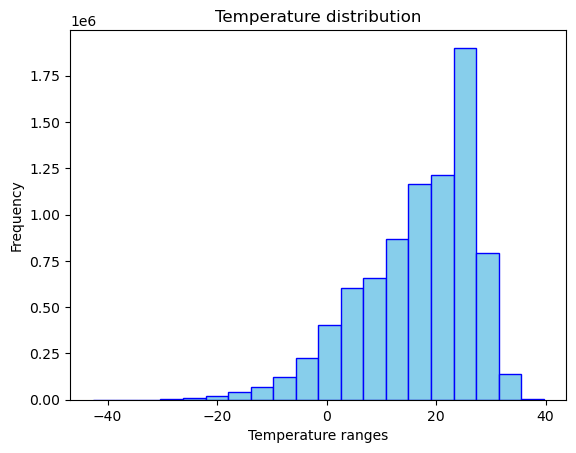

In [26]:
plt.hist(dist,bins=20,color='skyblue',edgecolor='blue')
plt.title("Temperature distribution")
plt.xlabel("Temperature ranges")
plt.ylabel("Frequency")

In [27]:
#Scatter plot - is there a correlation between temp and uncertainity in dataset
correlation = df['AverageTemperature'].corr(df['AverageTemperatureUncertainty'])

Text(0, 0.5, 'Average Temperature Uncertainty')

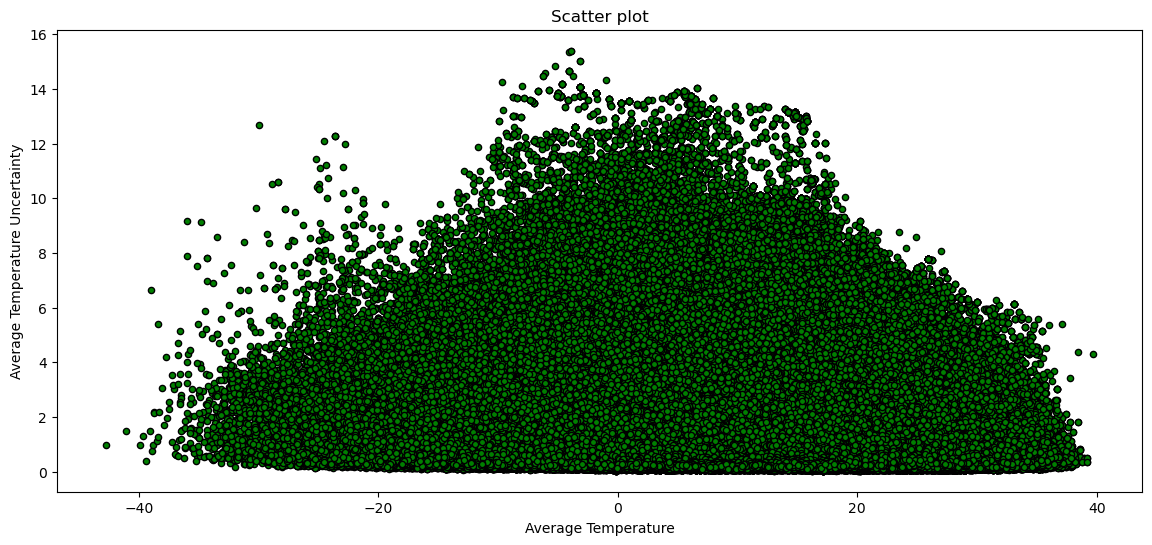

In [28]:
plt.figure(figsize=(14,6))
plt.scatter(df['AverageTemperature'],df['AverageTemperatureUncertainty'], color='green', s=20, edgecolor='black')
plt.title("Scatter plot")
plt.xlabel('Average Temperature')
plt.ylabel('Average Temperature Uncertainty')

In [29]:
# Box plot

In [30]:
country=df[df['Country']=='India'].copy()
country['dt']=pd.to_datetime(country['dt'],errors='coerce')
country=country.dropna(subset=['dt'])
country['Year']=country['dt'].dt.year
country=country[['Year','AverageTemperature']].dropna()
grouped_data=[group['AverageTemperature'] for _,group in country.groupby('Year')]

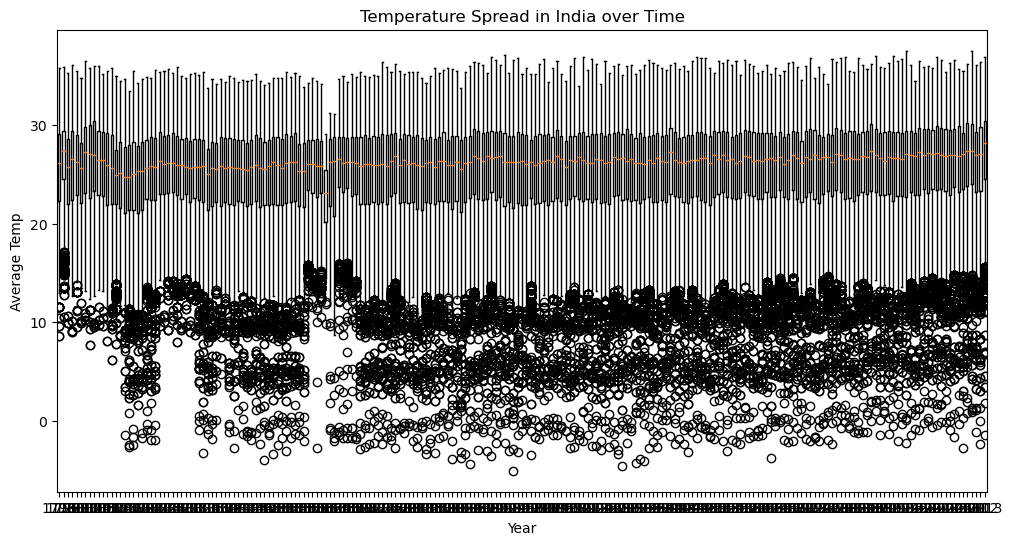

In [32]:
plt.figure(figsize=(12,6))
plt.boxplot(grouped_data)
plt.xticks(ticks=range(1, len(sorted(country['Year'].unique())) + 1),
           labels=sorted(country['Year'].unique()))
plt.xlabel('Year')
plt.ylabel('Average Temp')
plt.title("Temperature Spread in India over Time")
plt.show()